In [25]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime


In [5]:
# current weather

In [30]:
import requests

API_KEY = "API code hidden for security concerns "
# Interactive city selection
CITY = input("Enter city name (e.g., Mumbai, Delhi): ").capitalize()
print(f"🌍 Fetching weather for {CITY}...")

print("basic setup completes. API ready")
current_url = f"http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"
response = requests.get(current_url)

print("📡 STATUS CODE:", response.status_code)
print("📄 FULL RESPONSE:")
print(response.json())
print("\n🔍 URL used:", current_url)


Enter city name (e.g., Mumbai, Delhi):  mumbai


🌍 Fetching weather for Mumbai...
basic setup completes. API ready
📡 STATUS CODE: 200
📄 FULL RESPONSE:
{'coord': {'lon': 72.8479, 'lat': 19.0144}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 27.99, 'feels_like': 29.55, 'temp_min': 27.99, 'temp_max': 27.99, 'pressure': 1014, 'humidity': 61, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 2100, 'wind': {'speed': 2.57, 'deg': 320}, 'clouds': {'all': 4}, 'dt': 1769954112, 'sys': {'type': 1, 'id': 9052, 'country': 'IN', 'sunrise': 1769910171, 'sunset': 1769950879}, 'timezone': 19800, 'id': 1275339, 'name': 'Mumbai', 'cod': 200}

🔍 URL used: http://api.openweathermap.org/data/2.5/weather?q=Mumbai&appid=1df8de1b48f0169ea11316a8031b337a&units=metric


In [26]:


# Fetch FORECAST data (40 points = 5 days, 3hr intervals)
forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"
forecast_response = requests.get(forecast_url)
forecast_data = forecast_response.json()

print("✅ Forecast Status:", forecast_response.status_code)

# Convert to clean DataFrame
forecast_list = forecast_data['list']
df = pd.DataFrame([{
    'time': pd.to_datetime(item['dt_txt']),
    'temp': item['main']['temp'],
    'humidity': item['main']['humidity'],
    'wind': item['wind']['speed'],
    'description': item['weather'][0]['description']
} for item in forecast_list])

df.to_csv(f'{CITY.lower()}_weather_forecast.csv', index=False)
  # Save data
df.head(10)  # Show table


✅ Forecast Status: 200


,time,temp,humidity,wind,description
0,2026-02-01 15:00:00,27.65,60,5.32,few clouds
1,2026-02-01 18:00:00,26.39,64,3.65,clear sky
2,2026-02-01 21:00:00,24.90,66,2.74,clear sky
3,2026-02-02 00:00:00,24.22,69,3.79,clear sky
4,2026-02-02 03:00:00,24.17,69,3.12,clear sky
5,2026-02-02 06:00:00,25.94,60,0.47,clear sky
6,2026-02-02 09:00:00,26.23,57,4.73,clear sky
7,2026-02-02 12:00:00,25.05,70,5.91,clear sky
8,2026-02-02 15:00:00,24.45,75,2.88,clear sky
9,2026-02-02 18:00:00,24.46,73,0.74,clear sky


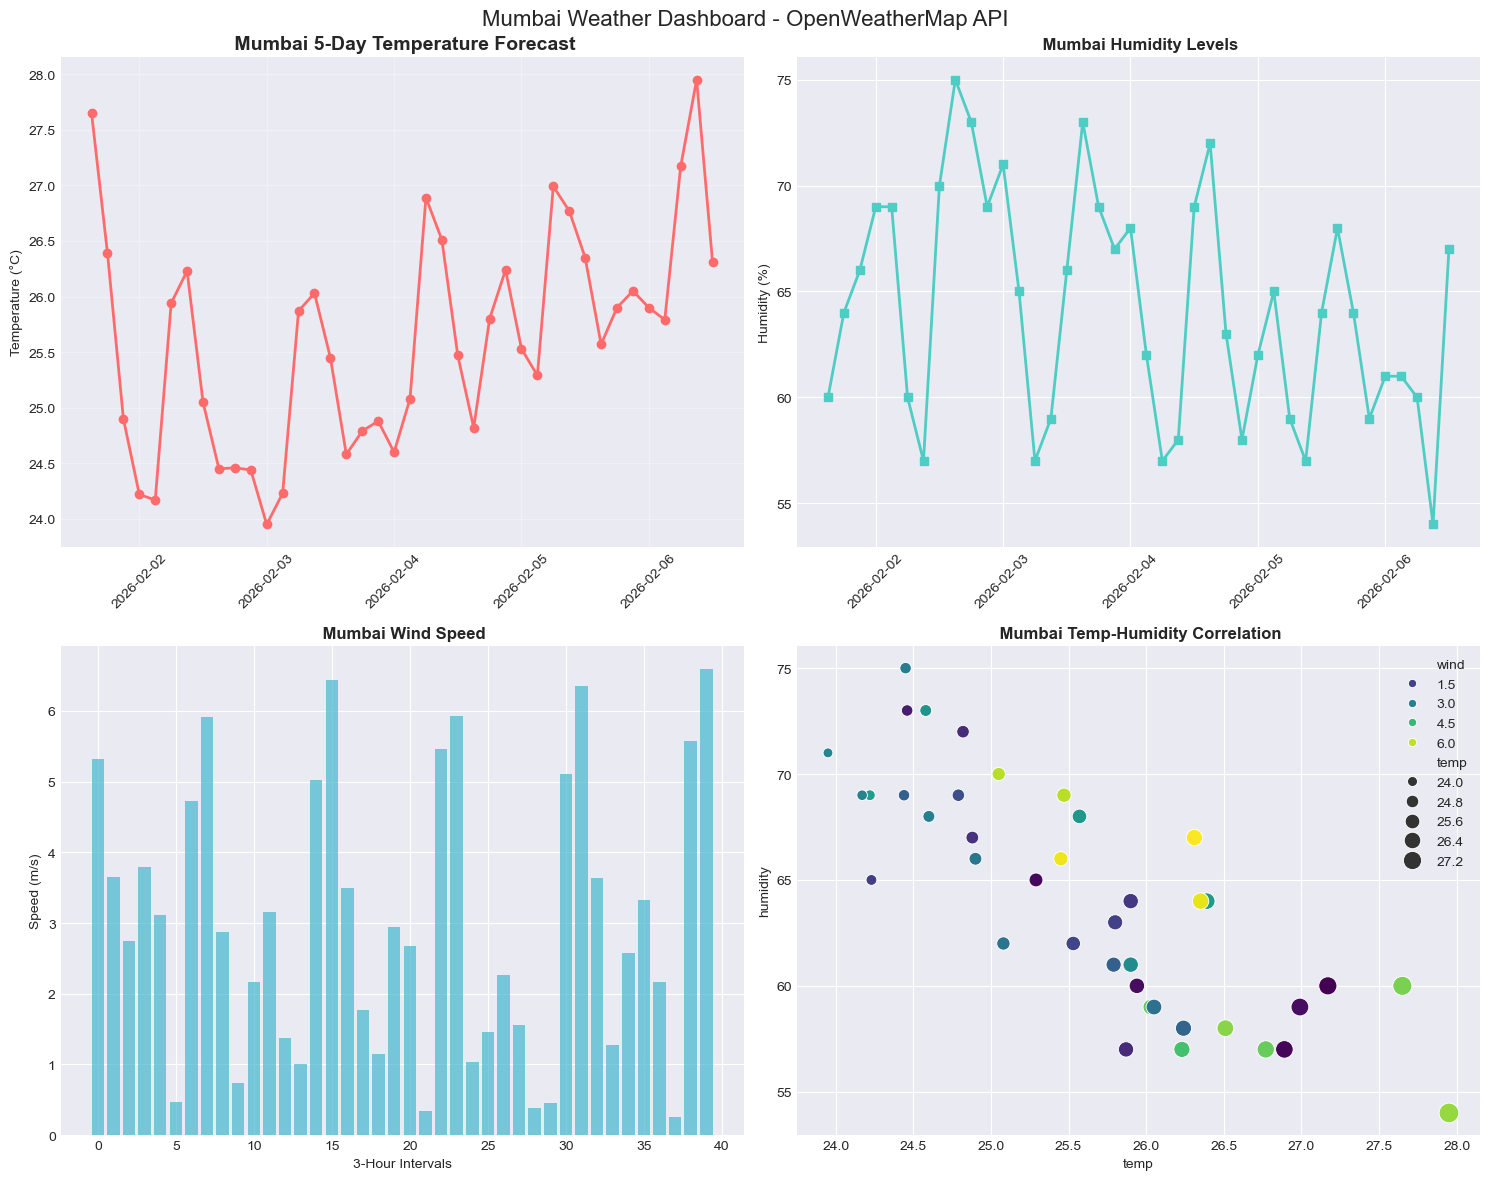

 'Mumbai_weather_dashboard.png' SAVED


In [27]:
plt.style.use('seaborn-v0_8-darkgrid')  # Professional look
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Temperature trend (main chart) - DYNAMIC CITY NAME
axes[0,0].plot(df['time'], df['temp'], marker='o', linewidth=2, markersize=6, color='#FF6B6B')
axes[0,0].set_title(f' {CITY} 5-Day Temperature Forecast', fontweight='bold', size=14)
axes[0,0].set_ylabel('Temperature (°C)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# 2. Humidity trend - DYNAMIC CITY NAME
axes[0,1].plot(df['time'], df['humidity'], marker='s', color='#4ECDC4', linewidth=2)
axes[0,1].set_title(f' {CITY} Humidity Levels', fontweight='bold')
axes[0,1].set_ylabel('Humidity (%)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Wind speed - DYNAMIC CITY NAME
axes[1,0].bar(range(len(df)), df['wind'], color='#45B7D1', alpha=0.7)
axes[1,0].set_title(f' {CITY} Wind Speed', fontweight='bold')
axes[1,0].set_xlabel('3-Hour Intervals')
axes[1,0].set_ylabel('Speed (m/s)')

# 4. Temp vs Humidity scatter (correlation) - DYNAMIC CITY NAME
sns.scatterplot(data=df, x='temp', y='humidity', hue='wind', size='temp', 
                sizes=(50, 200), ax=axes[1,1], palette='viridis')
axes[1,1].set_title(f' {CITY} Temp-Humidity Correlation', fontweight='bold')

# MAIN TITLE - DYNAMIC CITY NAME
plt.suptitle(f'{CITY} Weather Dashboard - OpenWeatherMap API', fontsize=16, y=0.98)

plt.tight_layout()
plt.savefig(f'{CITY.lower()}_weather_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f" '{CITY}_weather_dashboard.png' SAVED")


In [28]:
import os
print("📁 CURRENT WORKING DIRECTORY (CSV location):")
print(os.getcwd())
print("\n📄 CSV FILES HERE:")
for file in os.listdir('.'):
    if file.endswith('.csv'):
        print(f"✅ {file}")



📁 CURRENT WORKING DIRECTORY (CSV location):
C:\Users\adity

📄 CSV FILES HERE:
✅ mumbai_weather_forecast.csv
✅ pune_weather_forecast.csv
✅ weather_data_multi_city.csv
